<a href="https://colab.research.google.com/github/carlibeisel/DCEW_waterquality/blob/main/02_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Carli Beisel

Creation Date: November 1, 2024

Purpose: This script creates two sets of figures:

1. A plot of all known water quality data through time (from 2021 to 2024).

2. A linear regression comparing DCEW water quality to sampling distance from outlet.

## 1. A plot of all known water quality data through time (from 2021 to 2024).

In [ ]:
# --------------------------- #
# Import Packages & Libraries
# --------------------------- #
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

#Connect to Google Drive if you want to export images
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Classes/Hydro Field Course Working Files/Assignments/7. Data Analysis/Water Quality/Data/DCEW_combined_data.csv')

In [ ]:
data.columns

Index(['Unnamed: 0', 'Sample_Location', 'Date_Time', 'AA500_Bottle',
       'IC_Bottle', 'Isotope_Bottle', 'Temperature_Field', 'EC_Field', 'pH',
       'Nutrients_NOx.Conc.', 'Nutrients_NOx.STD', 'Nutrients_NOx.DL',
       'Nutrients_PO4.Conc.', 'Nutrients_PO4.STD', 'Nutrients_PO4.DL',
       'Nutrients_NH3.Conc.', 'Nutrients_NH3.STD', 'Nutrients_NH3.DL',
       'Nutrients_SiO2.Conc.', 'Nutrients_SiO2.STD', 'Nutrients_SiO2.DL',
       'Cations_NH3_N_Conc.', 'Cations_NH3_N_DL', 'Cations_NH3_N_std',
       'Cations_Ca_Conc.', 'Cations_Ca_DL', 'Cations_Ca_std',
       'Cations_Li_Conc.', 'Cations_Li_DL', 'Cations_Li_std',
       'Cations_Mg_Conc.', 'Cations_Mg_DL', 'Cations_Mg_std',
       'Cations_K_Conc.', 'Cations_K_DL', 'Cations_K_std', 'Cations_Na_Conc.',
       'Cations_Na_DL', 'Cations_Na_std', 'Anions_Cl_Conc.', 'Anions_Cl_DL',
       'Anions_Cl_std', 'Anions_F_Conc.', 'Anions_F_DL', 'Anions_F_std',
       'Anions_NO2_Conc.', 'Anions_NO2_DL', 'Anions_NO2_std',
       'Anions_NO3_

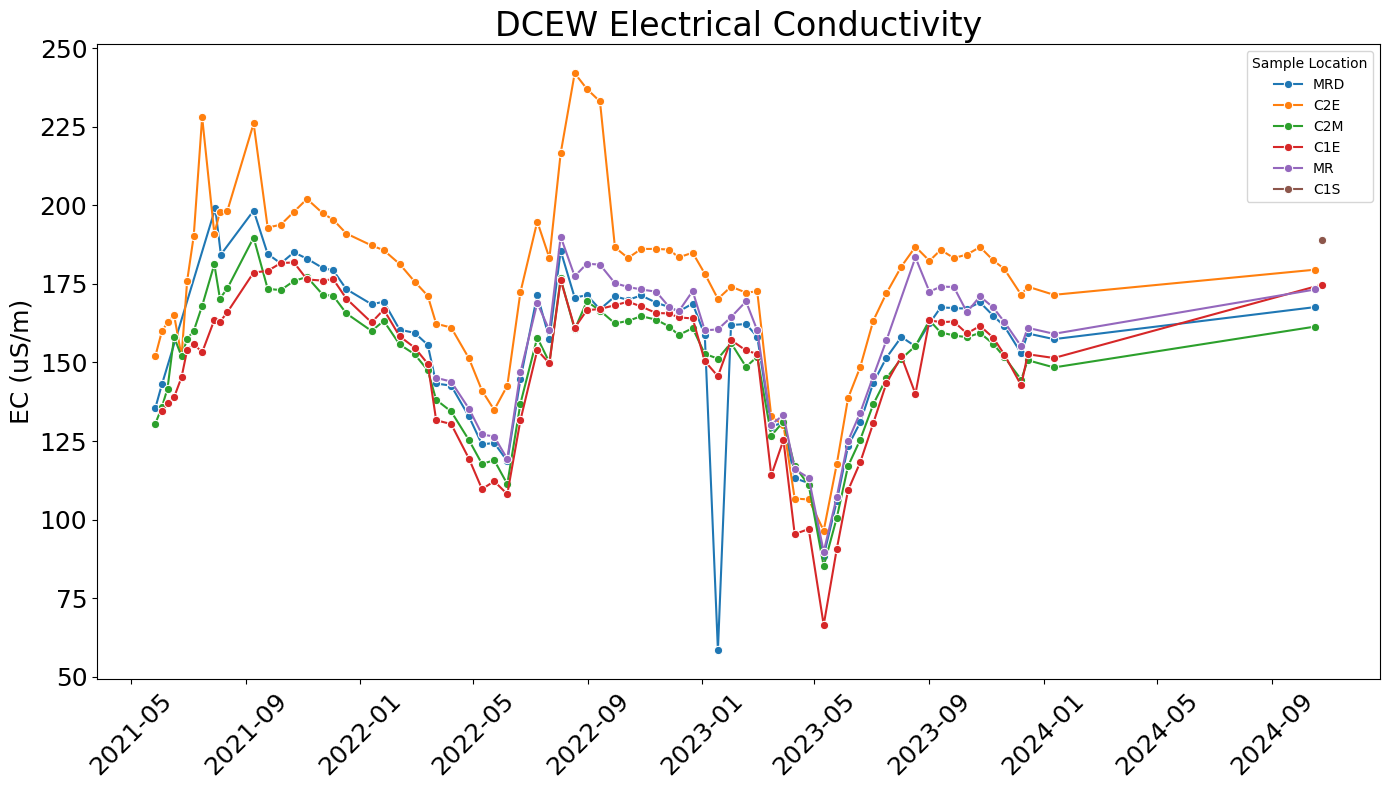

In [ ]:
# ------- #
# EC Plot
# ------- #

data['Date'] = pd.to_datetime(data['Date'], errors='coerce').dt.date
data = data[data['EC_Field'] < 1000] #filter out one crazy datapoint

plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x='Date', y='EC_Field', hue='Sample_Location', marker='o')

plt.title('DCEW Electrical Conductivity', fontsize = 24)
plt.xlabel('')
plt.xticks(fontsize = 18)
plt.ylabel('EC (uS/m)', fontsize = 18)
plt.yticks (fontsize = 18)
plt.xticks(rotation=45)
plt.legend(title='Sample Location')
plt.tight_layout()
plt.show()

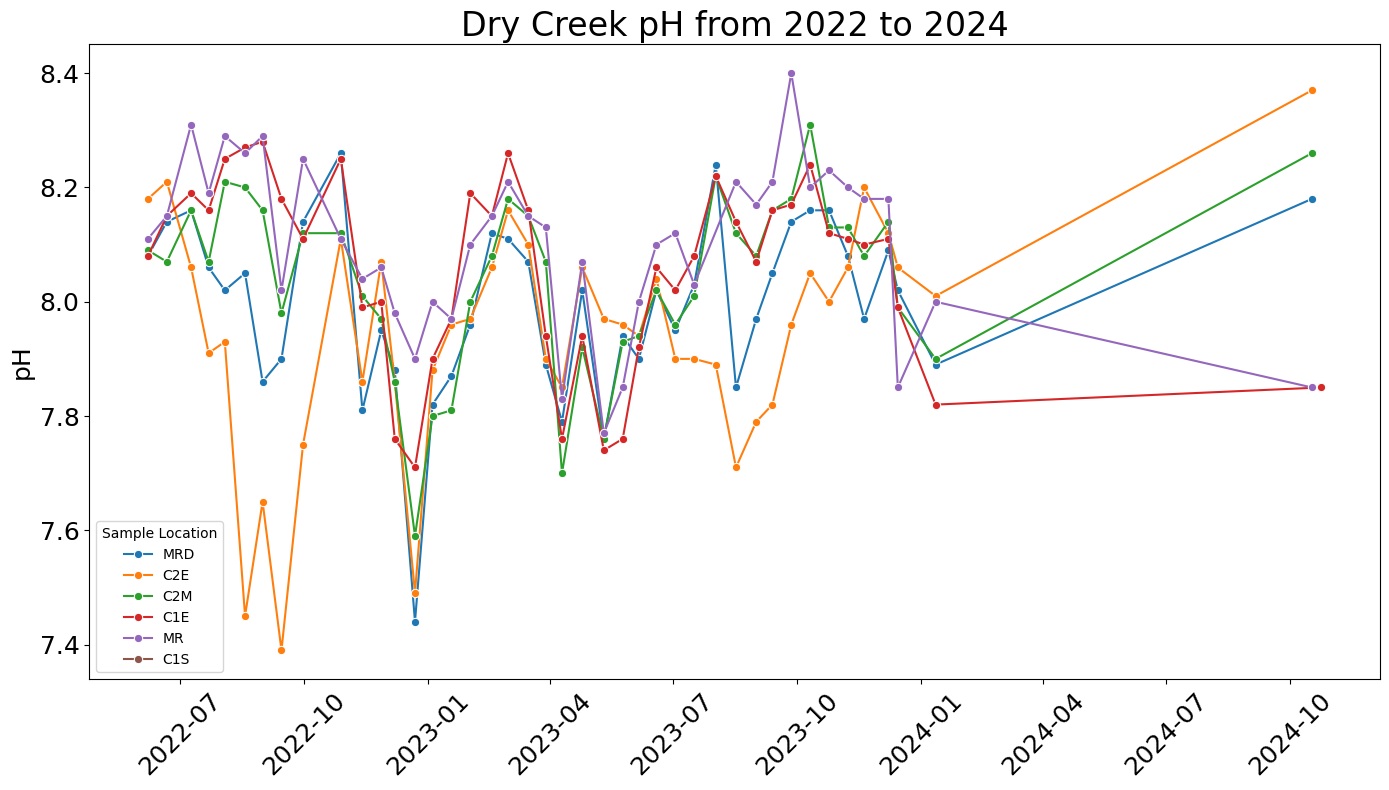

In [ ]:
# ------- #
# pH Plot
# ------- #

data['Date'] = pd.to_datetime(data['Date'], errors='coerce').dt.date

plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x='Date', y='pH', hue='Sample_Location', marker='o')

plt.title('Dry Creek pH from 2022 to 2024', fontsize = 24)
plt.xlabel('')
plt.xticks(fontsize = 18)
plt.ylabel('pH', fontsize = 18)
plt.yticks (fontsize = 18)
plt.xticks(rotation=45)
plt.legend(title='Sample Location')
plt.tight_layout()
plt.show()

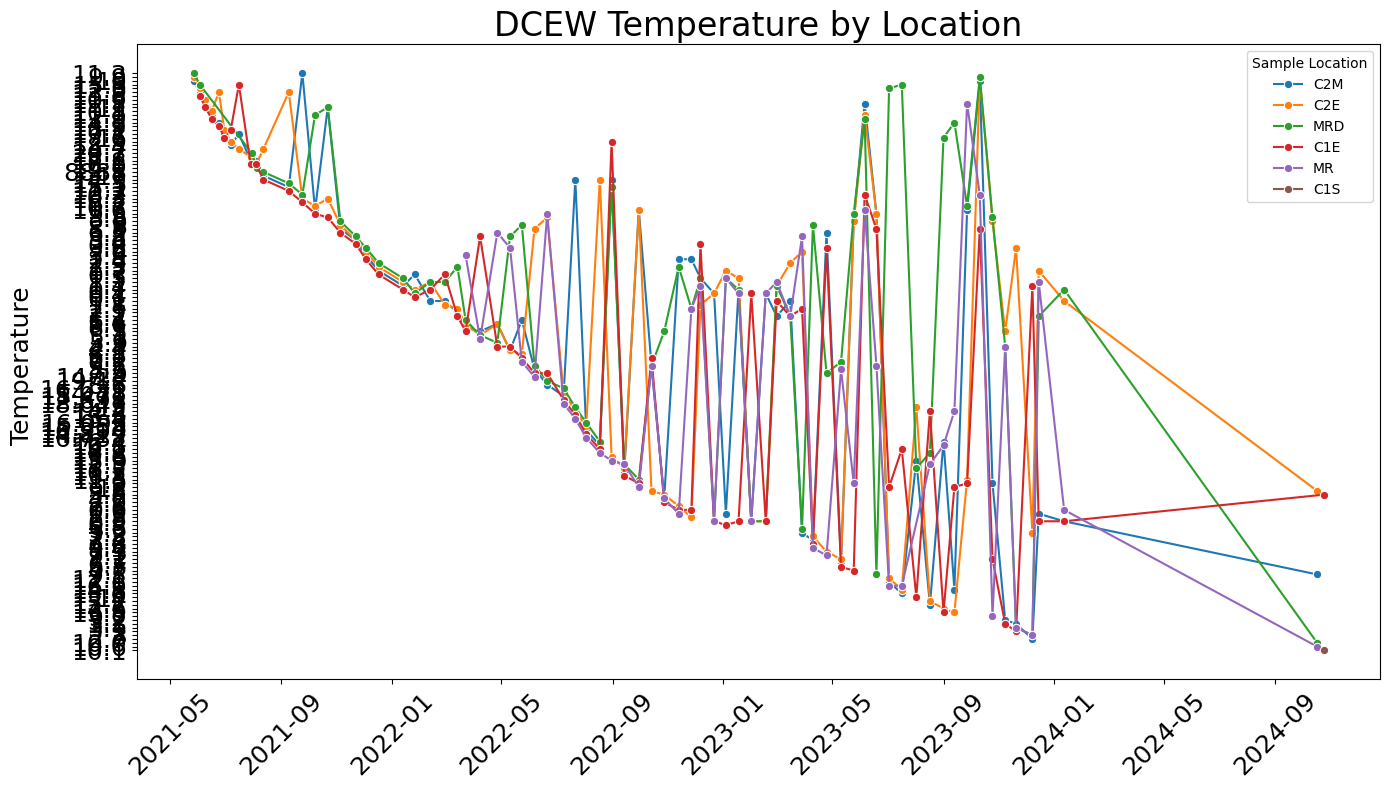

In [ ]:
# ------- #
# Temp Plot
# ------- #

data['Date'] = pd.to_datetime(data['Date'], errors='coerce').dt.date

plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x='Date', y='Temperature_Field', hue='Sample_Location', marker='o')

plt.title('DCEW Temperature by Location', fontsize = 24)
plt.xlabel('')
plt.xticks(fontsize = 18)
plt.ylabel('Temperature (C)', fontsize = 18)
plt.yticks (fontsize = 18)
plt.xticks(rotation=45)
plt.legend(title='Sample Location')
plt.tight_layout()
plt.show()

## 2. A linear regression comparing DCEW water quality to sampling distance from outlet for only samples collected in November 2024.

In [ ]:
# --------------------------- #
# Import Packages & Libraries
# --------------------------- #
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

#Connect to Google Drive if you want to export images
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Classes/Hydro Field Course Working Files/Assignments/7. Data Analysis/Water Quality/Data/WQ Metadata - DCEW - Master Sheet.csv')

In [ ]:
data.columns

,Sample Date,Sample ID,Site Name,GPS Coordinates (MT),Distance from Outlet,EC (uS/m),Temp (C),pH,SSL (mg/L),Nitrate (mg/L),Ammonium (mg/L),Phosphate (mg/L),Sampling Notes,Analysis Notes,Distance from
0,10/17,C2M,Con2Main,"43.7022778, -116.154095",2718,161.4,9.5,8.26,1.865515,x,NaN,NaN,NaN,NaN,NaN
1,10/17,MRD,Meadown Reach Down,"43.7002778, -116.156944",2397,167.6,10.0,8.18,2.809225,x,NaN,NaN,NaN,NaN,NaN
2,10/17,MR,Middle Rose,"43.6897222, -116.1705555",703,173.2,10.6,7.85,2.872408,x,NaN,NaN,NaN,NaN,NaN
3,10/17,C2E,Con2East,"43.7027903, -116.1527722",2845,179.5,9.8,8.37,0.930388,x,NaN,NaN,NaN,NaN,NaN
4,10/24,C1S,Con1Spring,"43.71883, -116.13778",5558,188.8,10.1,NaN,NaN,x,NaN,NaN,Not enough water to get a 1L sample for TSS,NaN,NaN
5,10/24,C1E,Con1East,"43.71804, -116.13737",5470,174.7,5.8,7.85,0.473207,x,NaN,NaN,NaN,NaN,NaN


In [ ]:
data

,Sample Date,Sample ID,Site Name,GPS Coordinates (MT),Distance from Outlet,EC (uS/m),Temp (C),pH,SSL (mg/L),Nitrate (mg/L),Ammonium (mg/L),Phosphate (mg/L),Sampling Notes,Analysis Notes,Distance from,Distance from outlet
0,10/17,C2M,Con2Main,"43.7022778, -116.154095",2718,161.4,9.5,8.26,1.865515,x,NaN,NaN,NaN,NaN,NaN,NaN
1,10/17,MRD,Meadown Reach Down,"43.7002778, -116.156944",2397,167.6,10.0,8.18,2.809225,x,NaN,NaN,NaN,NaN,NaN,NaN
2,10/17,MR,Middle Rose,"43.6897222, -116.1705555",703,173.2,10.6,7.85,2.872408,x,NaN,NaN,NaN,NaN,NaN,NaN
3,10/17,C2E,Con2East,"43.7027903, -116.1527722",2845,179.5,9.8,8.37,0.930388,x,NaN,NaN,NaN,NaN,NaN,NaN
4,10/24,C1S,Con1Spring,"43.71883, -116.13778",5558,188.8,10.1,NaN,NaN,x,NaN,NaN,Not enough water to get a 1L sample for TSS,NaN,NaN,NaN
5,10/24,C1E,Con1East,"43.71804, -116.13737",5470,174.7,5.8,7.85,0.473207,x,NaN,NaN,NaN,NaN,NaN,NaN


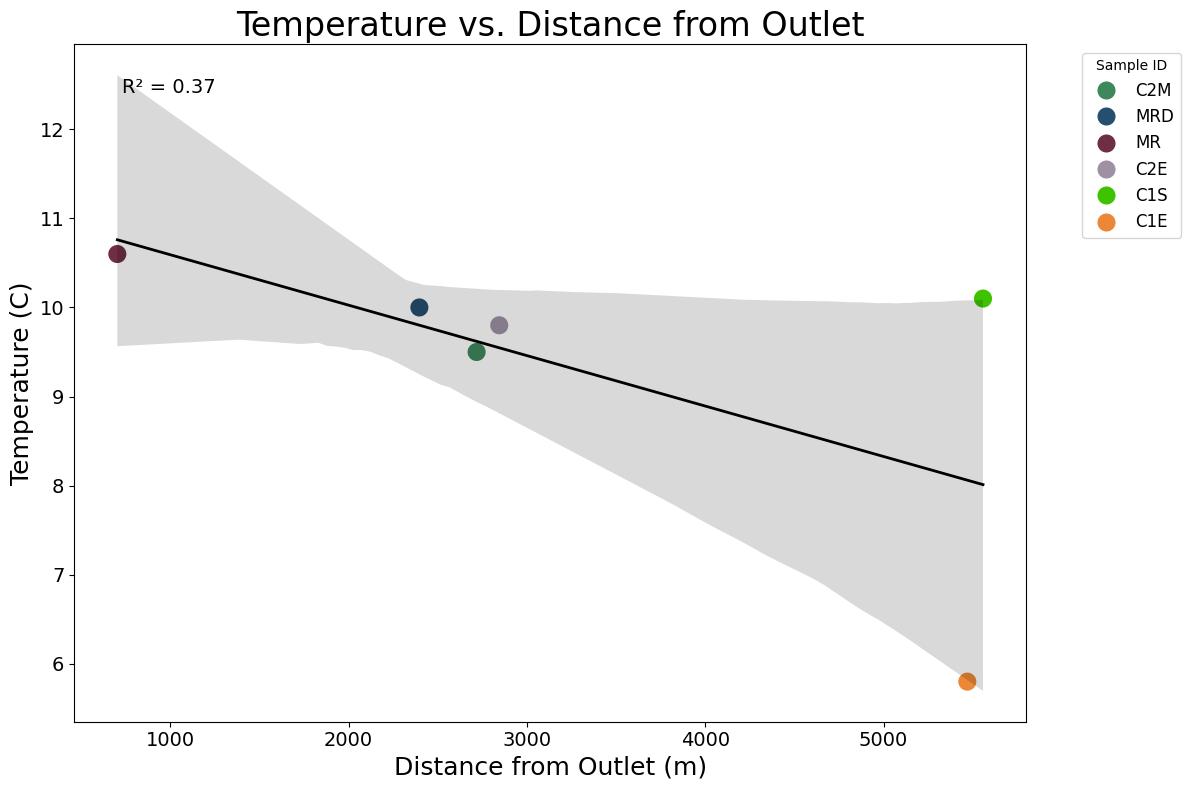

In [ ]:
# Define custom colors for each Sample ID
custom_palette = {
    'C2M': '#3E885B',
    'MRD': '#254E70',
    'MR': '#6D2E46',
    'C2E': '#9D91A3',
    'C1S': '#3EC300',
    'C1E': '#EB8736'
}

# Calculate the regression line and R² value
slope, intercept, r_value, p_value, std_err = linregress(data['Distance from Outlet'], data['Temp (C)'])
r_squared = r_value**2

# Plot scatter with custom colors for each Sample ID
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Distance from Outlet', y='Temp (C)', hue='Sample ID', palette=custom_palette, s=200)

# Add a single regression line for the entire dataset
sns.regplot(data=data, x='Distance from Outlet', y='Temp (C)', scatter=False, color='black', line_kws={'linewidth': 2})

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

# Add plot labels and title
plt.title('Temperature vs. Distance from Outlet', fontsize=24)
plt.xlabel('Distance from Outlet (m)', fontsize=18)
plt.ylabel('Temperature (C)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Move the legend outside the plot
plt.legend(title='Sample ID', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
temp = plt

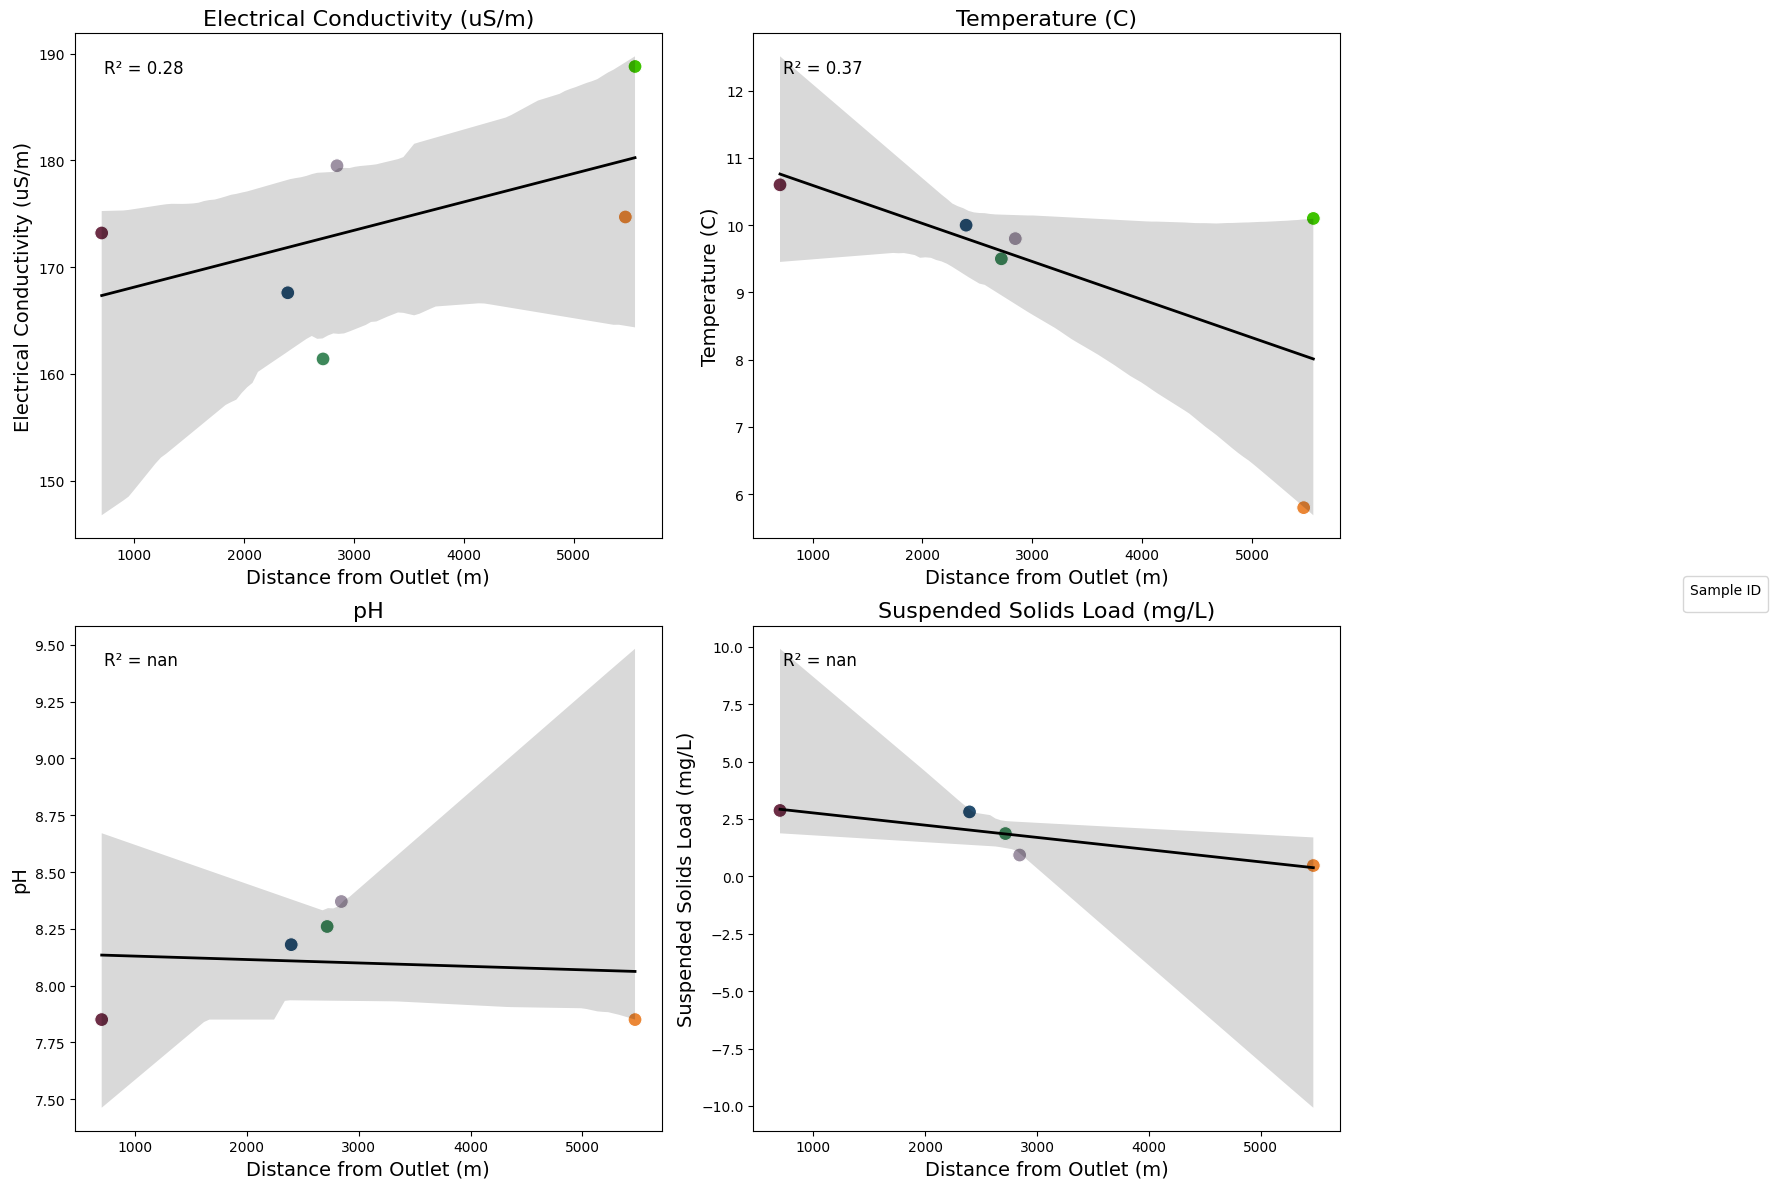

In [ ]:

custom_palette = {
    'C2M': '#3E885B',
    'MRD': '#254E70',
    'MR': '#6D2E46',
    'C2E': '#9D91A3',
    'C1S': '#3EC300',
    'C1E': '#EB8736'
}

# Define the variables to plot
variables = {
    "EC (uS/m)": "Electrical Conductivity (uS/m)",
    "Temp (C)": "Temperature (C)",
    "pH": "pH",
    "SSL (mg/L)": "Suspended Solids Load (mg/L)"
}

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Plot each variable against Distance from Outlet
for i, (variable, ylabel) in enumerate(variables.items()):
    # Calculate the regression line and R² value
    slope, intercept, r_value, p_value, std_err = linregress(data['Distance from Outlet'], data[variable])
    r_squared = r_value**2

    # Scatter plot with custom colors (suppress legend in each individual plot)
    scatter = sns.scatterplot(data=data, x='Distance from Outlet', y=variable, hue='Sample ID', palette=custom_palette, s=100, ax=axes[i], legend=False)

    # Add a single regression line for the entire dataset with 95% confidence interval
    sns.regplot(data=data, x='Distance from Outlet', y=variable, scatter=False, color='black', line_kws={'linewidth': 2}, ci=95, ax=axes[i])

    # Add R² value to the plot
    axes[i].text(0.05, 0.95, f'R² = {r_squared:.2f}', transform=axes[i].transAxes, fontsize=12, verticalalignment='top')

    # Add labels and title
    axes[i].set_title(f'{ylabel}', fontsize=16)
    axes[i].set_xlabel('Distance from Outlet (m)', fontsize=14)
    axes[i].set_ylabel(ylabel, fontsize=14)

# Add a single legend with the colors for Sample ID to the right of the figure
handles, labels = scatter.get_legend_handles_labels()
fig.legend(handles, labels, title='Sample ID', loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=12)

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right for the legend
plt.show()